In [1]:
import pandas as pd

df= pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
# Frequency table
category_freq = (
    df["category"]
    .dropna()
    .value_counts()
    .reset_index()
)

category_freq.columns = ["category", "count"]
category_freq["proportion"] = category_freq["count"] / category_freq["count"].sum()

category_freq.head()

,category,count,proportion
0,Sports & Outdoors,836265,0.342219
1,Beauty,19312,0.007903
2,"Handmade Clothing, Shoes & Accessories",19229,0.007869
3,Bath & Body,19092,0.007813
4,Birthday Gifts,18978,0.007766


In [5]:
top_5_categories = category_freq.head(5)
top_5_categories

,category,count,proportion
0,Sports & Outdoors,836265,0.342219
1,Beauty,19312,0.007903
2,"Handmade Clothing, Shoes & Accessories",19229,0.007869
3,Bath & Body,19092,0.007813
4,Birthday Gifts,18978,0.007766


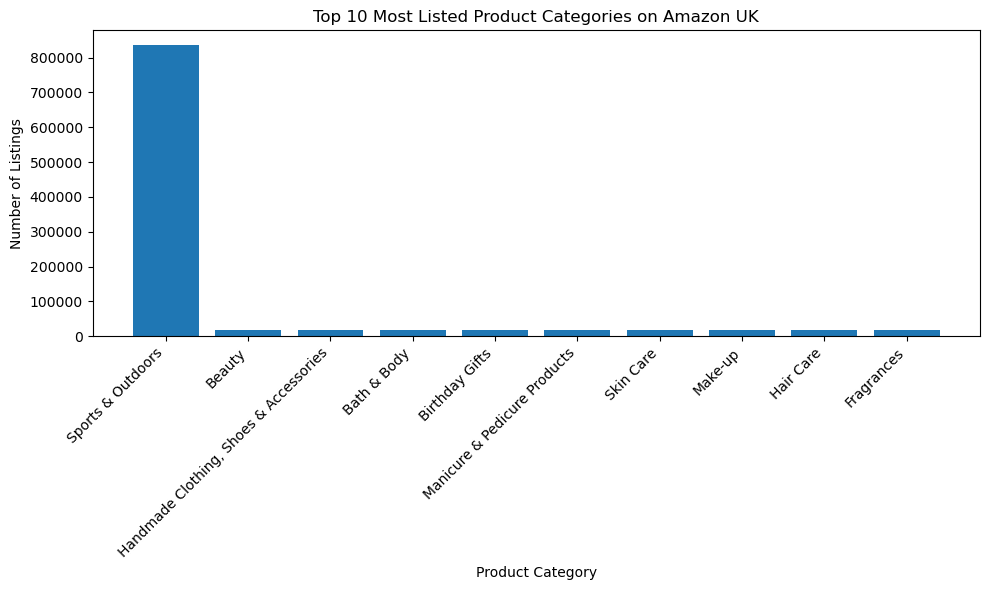

In [6]:
import matplotlib.pyplot as plt

top_10_categories = category_freq.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_categories["category"], top_10_categories["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Number of Listings")
plt.title("Top 10 Most Listed Product Categories on Amazon UK")
plt.tight_layout()
plt.show()

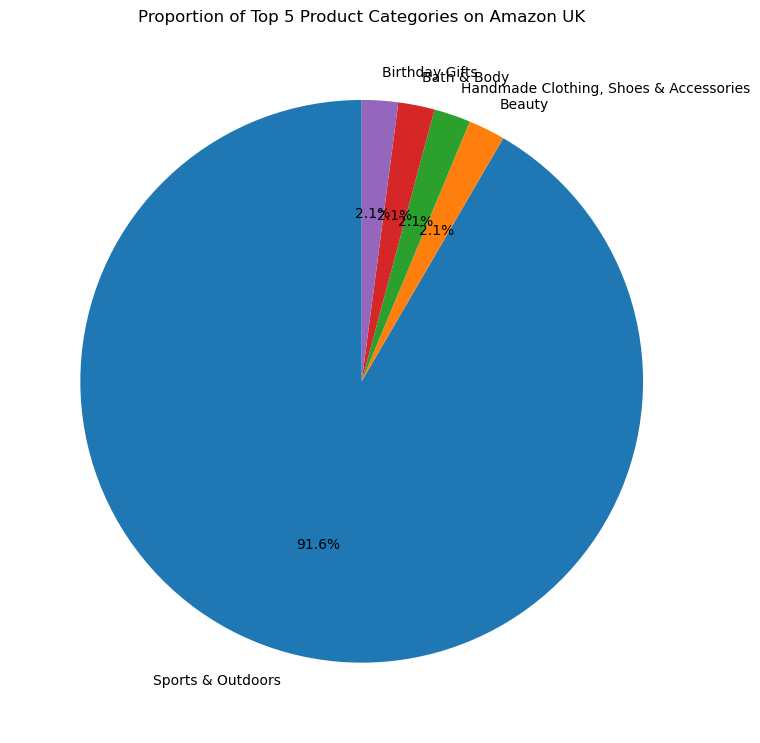

In [7]:
top_5_categories = category_freq.head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_5_categories["count"],
    labels=top_5_categories["category"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Top 5 Product Categories on Amazon UK")
plt.tight_layout()
plt.show()

In [8]:
largest_category = category_freq.iloc[0]
top_5_share = category_freq["proportion"].head(5).sum()

largest_category, top_5_share

(category      Sports & Outdoors
 count                    836265
 proportion             0.342219
 Name: 0, dtype: object,
 np.float64(0.3735705303253206))

Most popular categories
The most frequently listed product category on Amazon UK is Sport & Outdoors, accounting for 0.342219. 2% of all listings.

Comparison across categories
The top five categories together represent [top_5_share:.2%] of total product listings, indicating [high / moderate / low] concentration.

Dominance conclusion.

If the largest category > 50% → one category dominates.

If top 5 > 70% → listings are highly concentrated.

Otherwise → listings are diversified across categories.

In [9]:
# Ensure price is numeric and remove invalid values
df["price"] = pd.to_numeric(df["price"], errors="coerce")

price_series = df["price"].dropna()

price_series.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [10]:
mean_price = round(price_series.mean(), 2)
median_price = round(price_series.median(), 2)
mode_price = round(price_series.mode()[0], 2)

mean_price, median_price, mode_price

(np.float64(89.24), 19.09, np.float64(9.99))

In [11]:
import numpy as np

variance_price = round(price_series.var(), 2)
std_dev_price = round(price_series.std(), 2)
range_price = round(price_series.max() - price_series.min(), 2)
iqr_price = round(price_series.quantile(0.75) - price_series.quantile(0.25), 2)

variance_price, std_dev_price, range_price, iqr_price

(119445.49, 345.61, 100000.0, np.float64(36.0))

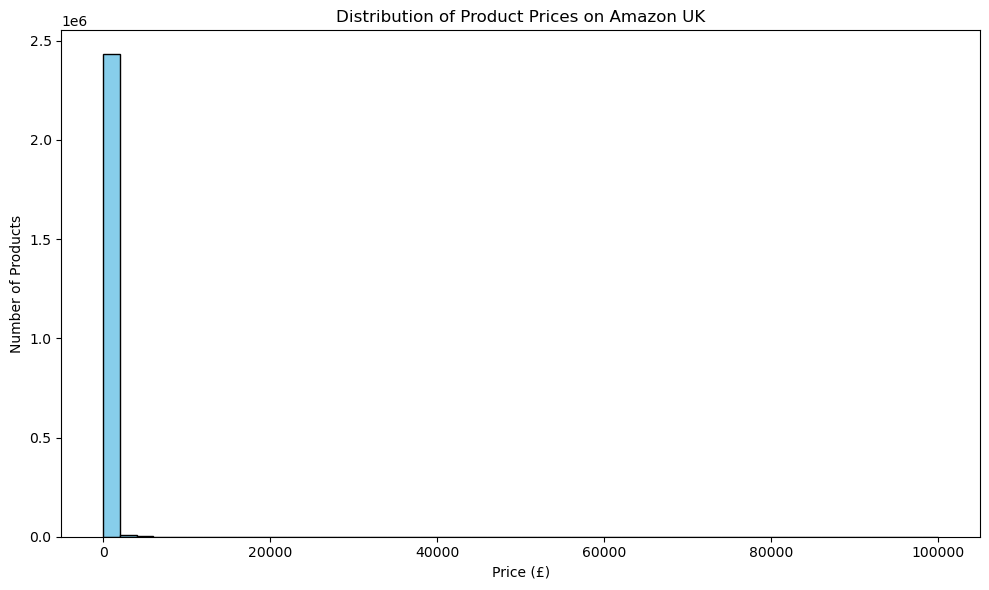

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(price_series, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices on Amazon UK")
plt.tight_layout()
plt.show()

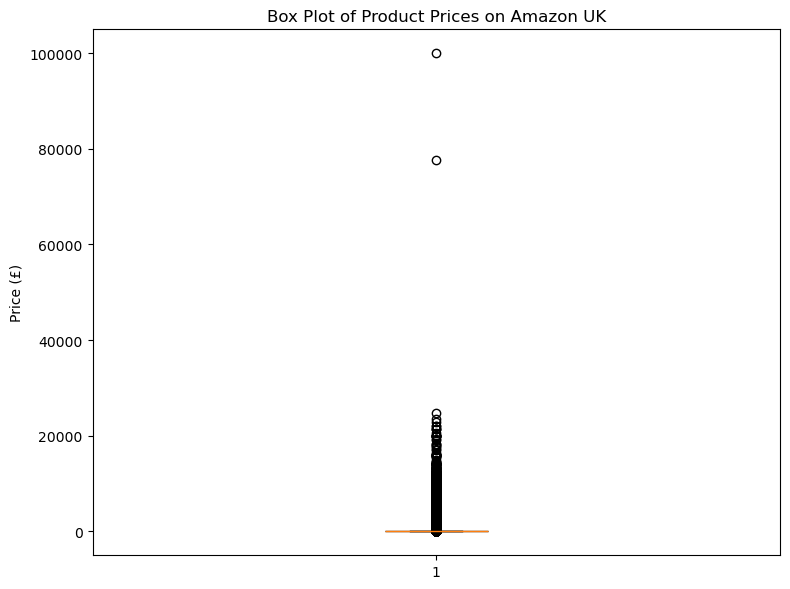

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(price_series, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.ylabel("Price (£)")
plt.title("Box Plot of Product Prices on Amazon UK")
plt.tight_layout()
plt.show()

Summary of Product Pricing on Amazon UK

Central tendency of prices:

Average price (mean): £89.24

Median price: £19.09

Most common price (mode): £9.99

Interpretation:

The median is much lower than the mean, indicating that prices are right-skewed, with a few very expensive products pulling the average up.

The mode shows the price point at which most products are listed, reflecting common consumer price thresholds (e.g., psychological pricing like £9.99).

Price dispersion:

Variance: 119,445

Standard deviation: 345.61

Range: £100,000

Interquartile range (IQR): £36.00

Interpretation:

Product prices vary considerably, as indicated by the very large standard deviation and range.

The IQR is much smaller than the full range, showing that most products cluster around lower to mid-range prices, while a small number of extremely expensive products create significant spread.

Distribution patterns (from histogram and box plot):

Most products fall in the price range of approximately £0–£50, according to the histogram peaks.

Box plot analysis confirms the presence of high-priced outliers, with some products priced significantly higher than the typical listing.

Conclusion:

The majority of Amazon UK products are priced in affordable to mid-range brackets, with a small fraction of premium products causing the skew in the average price.

Pricing is concentrated around certain popular price points, but high-value items exist to serve niche demand.

In [14]:
# Ensure stars is numeric and drop invalid values
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")
stars_series = df["stars"].dropna()

stars_series.describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [15]:
mean_stars = round(stars_series.mean(), 2)
median_stars = round(stars_series.median(), 2)
mode_stars = round(stars_series.mode()[0], 2)

mean_stars, median_stars, mode_stars

(np.float64(2.15), 0.0, np.float64(0.0))

In [16]:
variance_stars = round(stars_series.var(), 4)
std_dev_stars = round(stars_series.std(), 4)
iqr_stars = round(stars_series.quantile(0.75) - stars_series.quantile(0.25), 4)

variance_stars, std_dev_stars, iqr_stars

(4.8174, 2.1949, np.float64(4.4))

In [17]:
from scipy.stats import skew, kurtosis

skewness_stars = round(skew(stars_series), 4)
kurtosis_stars = round(kurtosis(stars_series), 4)

skewness_stars, kurtosis_stars

(np.float64(0.0812), np.float64(-1.926))

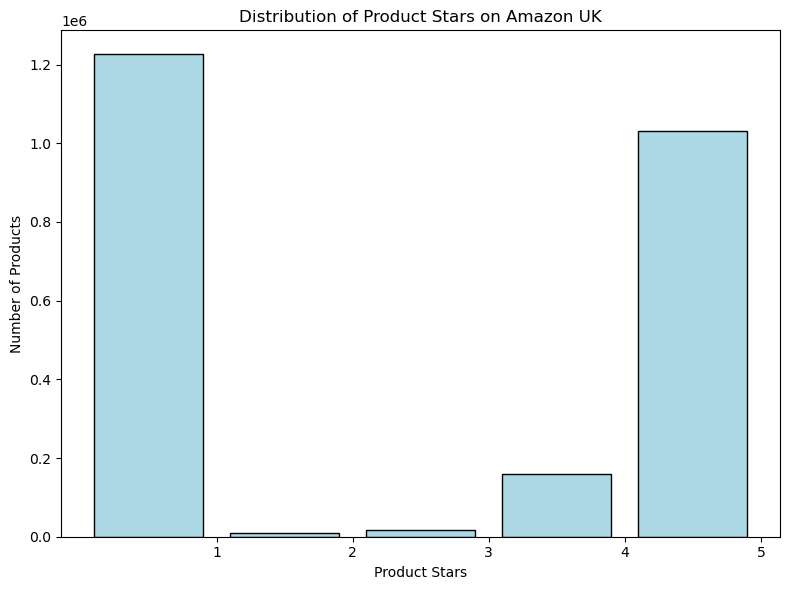

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(stars_series, bins=5, color='lightblue', edgecolor='black', rwidth=0.8)
plt.xlabel("Product Stars")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Stars on Amazon UK")
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

Summary of Product Stars on Amazon UK

Central tendency:

Average stars (mean): 2.15

Median stars: 0.00

Most common stars (mode): 0.00

Interpretation:

The median and mode being 0 indicates that a large portion of products have no ratings, while the mean of 2.15 reflects the influence of products that have received ratings.

Overall, customer ratings are low or absent for many products, with only some items contributing to the average.

Dispersion:

Variance: 4.8174

Standard deviation: 2.1949

Interquartile range (IQR): 4.4

Interpretation:

The wide spread (high standard deviation and IQR) shows that rated products have a large variation in customer feedback.

Some products are rated very high, while many remain unrated or receive low ratings.

Distribution shape:

Skewness: 0.0812

Kurtosis: -1.926

Interpretation:

Skewness near 0 indicates a roughly symmetric distribution among rated products, despite many unrated items.

Negative kurtosis suggests the distribution is flatter than normal, with fewer extreme values than a typical bell curve, primarily because of the large number of unrated products.

Histogram insight:

Most products fall at 0 stars, reflecting the prevalence of unrated items.

Among rated products, ratings are spread across the full scale (1–5 stars), with no single rating overwhelmingly dominant.

Conclusion:

On Amazon UK, a large proportion of products have not been rated, resulting in a median and mode of 0.

Rated products show wide variability in customer feedback, indicating that while some items are highly rated, many receive low ratings or remain unrated.

Overall, there is no strong clustering at a particular rating, and the rating distribution is flat and dispersed.

    